# Decision Tree Algorithm to Analyse Images Split into 9 Blocks

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow import keras as k
import random
from tqdm import tqdm
import shutil
import datetime, os
import matplotlib.pyplot as plt

#### Normalisation Function:

In [2]:
def normalise(x, y):
    x = tf.image.per_image_standardization(x)
    return x, y

#### Load Image Data:

In [3]:
data_total = np.load('/Users/joshking/Dropbox/Quantum/Triangles/normalised_data_matrices_train.npy')
labels_total = np.load('/Users/joshking/Dropbox/Quantum/Triangles/normalised_data_labels_train.npy')


val_split = 0.2
val_set = np.int(val_split*np.shape(labels_total)[0])


# train_images_un= np.array(data_total[val_set:]).reshape(-1, 32, 32, 1)
# print(np.squeeze(train_images_un[6])[0,:])


data_total,labels_total = normalise(data_total,labels_total) 


train_images= np.array(data_total[val_set:]).reshape(-1, 32, 32, 1)
# print(np.squeeze(train_images[6])[0,:])
train_labels = np.array(labels_total[val_set:]).reshape(-1, 1)
validate_images = np.array(data_total[:val_set]).reshape(-1, 32, 32, 1)
validate_labels = np.array(labels_total[:val_set]).reshape(-1, 1)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


#### Squeeze Data:

In [31]:
train_images=np.squeeze(train_images)
train_labels=np.squeeze(train_labels)
validate_images=np.squeeze(validate_images)
validate_labels=np.squeeze(validate_labels)


#### Test Data Properties:

Size of Training Data:  13370368 || Shape:  (13057, 32, 32) 

Shape of Single Image after Squeezing: (32, 32)

 One Row of of Pixel Values in Image: 

 [-0.23188065 -0.23188065 -0.23188065 -0.23188065 -0.2059872  -0.23188065
 -0.23188065 -0.23188065 -0.23188065 -0.23188065 -0.2059872  -0.2059872
 -0.25777408 -0.25777408 -0.23188065 -0.23188065 -0.23188065 -0.23188065
 -0.23188065 -0.25777408 -0.25777408 -0.25777408 -0.25777408  0.02705394
  0.67439044  0.07884085 -0.25777408 -0.25777408 -0.28366756 -0.25777408
 -0.25777408 -0.23188065]

 Image:  


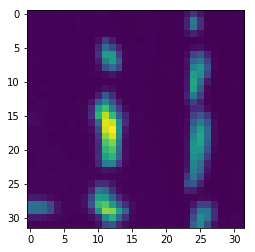

In [5]:
print('Size of Training Data: ', train_images.size, '|| Shape: ', train_images.shape, '\n')

#squeeze the data to remove empty dimension and allow easier image displaying
im_1= np.squeeze(train_images[6])
print('Shape of Single Image after Squeezing:', im_1.shape)
print('\n One Row of of Pixel Values in Image: \n\n', im_1[0,:])

print('\n Image:  ')
plt.imshow(im_1)

#### 9-Blocks Splitting Algorithm: 

In [6]:
def block_splitting(images):
    #Initialise Array:
    data_array=np.zeros(shape=(len(images),18))
    
    for i in range(len(images)):
        image = np.squeeze(train_images[i])
        #Split into blocks based on manually calculated pixel locations:
        block_1=image[0:15, 0:15]
        block_2=image[16:31, 0:15]
        block_3=image[0:15, 16:31]
        block_4=image[16:31, 16:31]
        block_5=image[8:23, 8:23]
        block_6=image[0:15, 8:23]
        block_7=image[8:23, 0:15]
        block_8=image[8:23, 16:31]
        block_9=image[16:31, 8:23]
        #Concatenate data into single 18-feature array:
        means=np.array([np.mean(block_1),np.mean(block_2),np.mean(block_3),np.mean(block_4),np.mean(block_5),np.mean(block_6),
               np.mean(block_7), np.mean(block_8),np.mean(block_9)])
        stds=np.array([np.std(block_1),np.std(block_2),np.std(block_3),np.std(block_4),np.std(block_5),np.std(block_6),
               np.std(block_7), np.std(block_8),np.std(block_9)])
        combined=np.concatenate((means,stds))
        #print(combined)
        data_array[i]=combined
    return data_array

#### Assign data:

In [7]:
train_X=block_splitting(train_images)
train_Y=train_labels
valid_X=block_splitting(validate_images)
valid_Y=validate_labels

#### Test Data:

In [8]:
print('train_X and train_Y Length: ', len(train_X),len(train_Y))
print('test_X and test_Y Length:  ', len(valid_X),len(valid_Y))
print('\ntrain_X Shape: ', train_X.shape)
print('\nExample of Labels (train_y): \n', train_Y)
print('Features example: ', train_X[6])

train_X and train_Y Length:  13057 13057
test_X and test_Y Length:   3264 3264

train_X Shape:  (13057, 18)

Example of Labels (train_y): 
 [0 0 0 ... 0 0 0]
Features example:  [ 8.98606199e-03  6.11210369e-01  8.06541670e-03  1.52148126e-01
  4.03026968e-01 -1.14115048e-03  4.17987625e-01  1.83910772e-01
  5.09362770e-01  7.32657190e-01  1.52374193e+00  7.17684393e-01
  9.01987418e-01  1.45534462e+00  7.36071330e-01  1.44878148e+00
  9.78278267e-01  1.52337931e+00]


In [32]:
from sklearn import preprocessing

scale = preprocessing.Normalizer().fit(train_X)

train_X_std = scale.transform(train_X.copy())
valid_X_std = scale.transform(valid_X.copy())
#Do I want to Normalise or Standardise? Ask Dom

In [33]:
Average_mean=0
for i in range(len(train_X_std)):
    for j in range(8):
        Average_mean+= train_X_std[i][j]
Average_mean = Average_mean/(8*len(train_X))
round(Average_mean,14)

-0.20172895802123

In [135]:
quarter_train=train_X[0:3000]
quarter_train_labels=train_Y[0:3000]
half_train=train_X[0:6000]
half_train_labels=train_Y[0:6000]



import random
import numpy as np
def myfunction():
    return 0.2

z=np.arange(len(train_X))
random.shuffle(z,myfunction)
print(z[:10])


train_copy=train_X.copy()
train_shuffle=train_X.copy()

train_labels_copy=train_Y.copy()
train_labels_shuffle=train_Y.copy()

for i in range(len(train_X)):
    train_shuffle[i]=train_copy[z[i]]
    train_labels_shuffle[i]=train_labels_copy[z[i]]   
print(train_shuffle.shape)


[11719  5469  8594     0  2969  3594  4219  4844     1  6094]
(13057, 18)


## Tree Classifiers:

#### Basic Decision Tree:

Accuracy Training=  0.8695718771540171
Accuracy Validating=  0.7454044117647058


[Text(170.9,187.033,'X[17] <= 0.936\ngini = 0.314\nsamples = 13057\nvalue = [10511, 2546]'),
 Text(85.45,112.22,'X[13] <= 0.671\ngini = 0.178\nsamples = 10773\nvalue = [9707, 1066]'),
 Text(42.725,37.4067,'gini = 0.145\nsamples = 9893\nvalue = [9115, 778]'),
 Text(128.175,37.4067,'gini = 0.44\nsamples = 880\nvalue = [592, 288]'),
 Text(256.35,112.22,'X[1] <= 0.438\ngini = 0.456\nsamples = 2284\nvalue = [804, 1480]'),
 Text(213.625,37.4067,'gini = 0.319\nsamples = 1403\nvalue = [280, 1123]'),
 Text(299.075,37.4067,'gini = 0.482\nsamples = 881\nvalue = [524, 357]')]

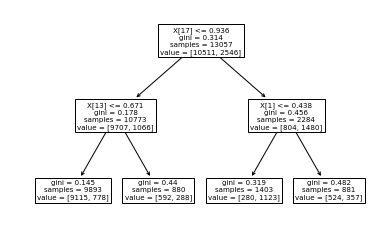

In [130]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error

tree_model=tree.DecisionTreeClassifier(random_state=1, max_depth=2)
tree_model.fit(train_X,train_Y)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

tree.plot_tree(tree_model.fit(train_X, train_Y))

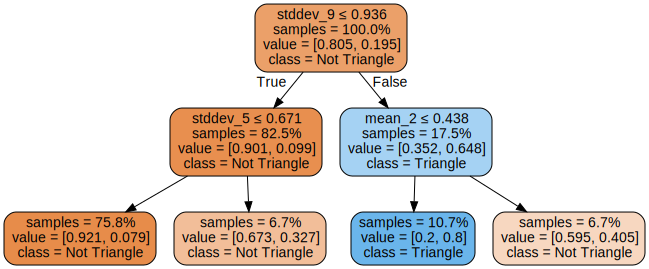

In [131]:
features_names=('mean_1', 'mean_2','mean_3', 'mean_4','mean_5', 'mean_6','mean_7', 'mean_8', 'mean_9',
                'stddev_1','stddev_2','stddev_3','stddev_4','stddev_5','stddev_6','stddev_7','stddev_8','stddev_9')
class_namess= ('Not Triangle', 'Triangle')
import graphviz
dot_data = tree.export_graphviz(tree_model, label='all', impurity= False, out_file=None, 
                                filled=True, proportion=True, feature_names=features_names, class_names=class_namess,
                                rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Training and Valid switched

Accuracy Training=  0.8117484874013938
Accuracy Validating=  0.8520220588235294


[Text(142.61,218.534,'X[17] <= 0.936\ngini = 0.314\nsamples = 13057\nvalue = [10511, 2546]'),
 Text(45.1092,206.721,'X[13] <= 0.671\ngini = 0.178\nsamples = 10773\nvalue = [9707, 1066]'),
 Text(13.8856,194.908,'X[7] <= -0.284\ngini = 0.145\nsamples = 9893\nvalue = [9115, 778]'),
 Text(6.10357,183.096,'X[11] <= 0.026\ngini = 0.493\nsamples = 43\nvalue = [24, 19]'),
 Text(3.66214,171.283,'X[11] <= 0.0\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(2.44143,159.471,'X[3] <= -0.284\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(1.22071,147.658,'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(3.66214,147.658,'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(4.88286,159.471,'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(8.545,171.283,'X[9] <= 0.399\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(7.32429,159.471,'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(9.76571,159.471,'X[15] <= 0.463\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(8.545,147.658,'gini = 0.0\

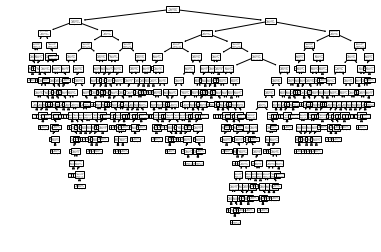

In [53]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error

tree_model=tree.DecisionTreeClassifier(random_state=1, max_depth=20)
tree_model.fit(valid_X,valid_Y)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

tree.plot_tree(tree_model.fit(train_X, train_Y))

#### Less training Data

Accuracy Training=  0.9015853565137474
Accuracy Validating=  0.7303921568627452


[Text(142.61,218.534,'X[17] <= 0.936\ngini = 0.314\nsamples = 13057\nvalue = [10511, 2546]'),
 Text(45.1092,206.721,'X[13] <= 0.671\ngini = 0.178\nsamples = 10773\nvalue = [9707, 1066]'),
 Text(13.8856,194.908,'X[7] <= -0.284\ngini = 0.145\nsamples = 9893\nvalue = [9115, 778]'),
 Text(6.10357,183.096,'X[11] <= 0.026\ngini = 0.493\nsamples = 43\nvalue = [24, 19]'),
 Text(3.66214,171.283,'X[11] <= 0.0\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(2.44143,159.471,'X[3] <= -0.284\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(1.22071,147.658,'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(3.66214,147.658,'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(4.88286,159.471,'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(8.545,171.283,'X[9] <= 0.399\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(7.32429,159.471,'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(9.76571,159.471,'X[15] <= 0.463\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(8.545,147.658,'gini = 0.0\

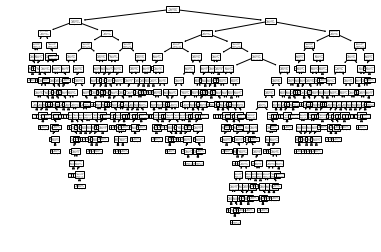

In [58]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error

tree_model=tree.DecisionTreeClassifier(random_state=1, max_depth=20)
tree_model.fit(quarter_train,quarter_train_labels)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

tree.plot_tree(tree_model.fit(train_X, train_Y))

#### Random Shuffle

Accuracy Training=  0.9434020065865053
Accuracy Validating=  0.7297794117647058


[Text(142.61,218.534,'X[17] <= 0.936\ngini = 0.314\nsamples = 13057\nvalue = [10511, 2546]'),
 Text(45.1092,206.721,'X[13] <= 0.671\ngini = 0.178\nsamples = 10773\nvalue = [9707, 1066]'),
 Text(13.8856,194.908,'X[7] <= -0.284\ngini = 0.145\nsamples = 9893\nvalue = [9115, 778]'),
 Text(6.10357,183.096,'X[11] <= 0.026\ngini = 0.493\nsamples = 43\nvalue = [24, 19]'),
 Text(3.66214,171.283,'X[11] <= 0.0\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(2.44143,159.471,'X[3] <= -0.284\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(1.22071,147.658,'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(3.66214,147.658,'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(4.88286,159.471,'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(8.545,171.283,'X[9] <= 0.399\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(7.32429,159.471,'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(9.76571,159.471,'X[15] <= 0.463\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(8.545,147.658,'gini = 0.0\

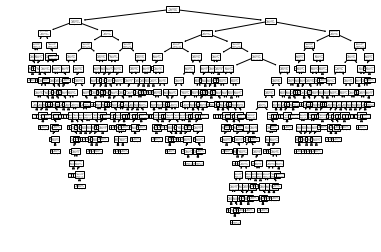

In [64]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error

tree_model=tree.DecisionTreeClassifier(random_state=1, max_depth=20)
tree_model.fit(train_shuffle,train_labels_shuffle)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

tree.plot_tree(tree_model.fit(train_X, train_Y))

Accuracy Training=  0.9434020065865053
Accuracy Validating=  0.7297794117647058


[Text(142.543,218.534,'X[17] <= 0.936\ngini = 0.314\nsamples = 13057\nvalue = [10511, 2546]'),
 Text(44.4496,206.721,'X[13] <= 0.671\ngini = 0.178\nsamples = 10773\nvalue = [9707, 1066]'),
 Text(12.7582,194.908,'X[7] <= -0.284\ngini = 0.145\nsamples = 9893\nvalue = [9115, 778]'),
 Text(5.93403,183.096,'X[3] <= -0.87\ngini = 0.493\nsamples = 43\nvalue = [24, 19]'),
 Text(2.37361,171.283,'X[9] <= 0.399\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(1.18681,159.471,'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(3.56042,159.471,'X[9] <= 0.45\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(2.37361,147.658,'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(4.74722,147.658,'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(9.49444,171.283,'X[11] <= 0.0\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(8.30764,159.471,'X[9] <= 0.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(7.12083,147.658,'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(9.49444,147.658,'gini = 0.0\nsa

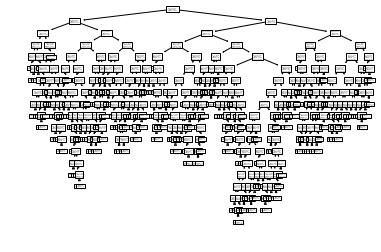

In [66]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error

tree_model=tree.DecisionTreeClassifier(random_state=20, max_depth=20)
tree_model.fit(train_shuffle,train_labels_shuffle)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

tree.plot_tree(tree_model.fit(train_X, train_Y))

#### Random Forest:

In [35]:
positive_total = 0
for i in range(len(valid_Y)):
    if valid_Y[i]>0.9:
        positive_total +=1
print('VALID Positive Labels= ', positive_total)
fraction_positive= (positive_total/len(valid_Y))
print('% positive= ', round(100*fraction_positive))

VALID Positive Labels=  610
% positive=  19


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

tree_model=RandomForestClassifier(n_estimators=10, random_state=1, max_depth=15)
tree_model.fit(train_X,train_Y)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))


print('[True Neg,  False Pos\n False Neg,  True Pos] \n', confusion_matrix(valid_Y, predicted_valid))
tn, fp, fn, tp = confusion_matrix(valid_Y, predicted_valid).ravel()
total = (tn+fp+fn+tp)
print('\nTrue Neg: ', round(100*tn/total), '\nFalse Neg: ', round(100*fn/total), '\nTrue Pos: ',
      round(100*tp/total), '\nFalse Pos: ', round(100*fp/total)  )

Accuracy Training=  0.9414107375354216
Accuracy Validating=  0.7300857843137255
[True Neg,  False Pos
 False Neg,  True Pos] 
 [[2289  365]
 [ 516   94]]

True Neg:  70.0 
False Neg:  16.0 
True Pos:  3.0 
False Pos:  11.0


#### Random Forest Less Estimators:

In [12]:
tree_model=RandomForestClassifier(n_estimators=4, random_state=1, max_depth=15)
tree_model.fit(train_X,train_Y)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

Accuracy Training=  0.9366623267212989
Accuracy Validating=  0.7291666666666667


#### Calculating Number of Positive Examples:

In [13]:
positive_total = 0
for i in range(len(labels_total)):
    if labels_total[i]>0.9:
        positive_total +=1
print('Total Positive Labels= ', positive_total)
fraction_positive= (positive_total/len(labels_total))
print('Fraction positive= ', round(fraction_positive, 5))

Total Positive Labels=  3156
Fraction positive=  0.19337


In [14]:
positive_total = 0
for i in range(len(train_labels)):
    if train_labels[i]>0.9:
        positive_total +=1
print('TRAIN Positive Labels= ', positive_total)
fraction_positive= (positive_total/len(train_labels))
print('Fraction positive= ', round(fraction_positive, 5))

TRAIN Positive Labels=  2546
Fraction positive=  0.19499


#### Creating Weighting Array:

In [67]:
holder=train_Y.copy()
print(holder[0:22])

train_weighting_array=np.empty(len(holder))

for i in range(len(holder)):
    if holder[i]==0:
        train_weighting_array[i]=round(fraction_positive, 5)
    if holder[i]==1:
        train_weighting_array[i]=(1-round(fraction_positive, 5))

train_weighting_array[0:22]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]


array([0.18689, 0.18689, 0.18689, 0.18689, 0.18689, 0.18689, 0.18689,
       0.18689, 0.18689, 0.18689, 0.18689, 0.18689, 0.18689, 0.18689,
       0.18689, 0.18689, 0.18689, 0.81311, 0.18689, 0.18689, 0.18689,
       0.81311])

In [68]:
print(train_weighting_array.shape, train_Y.shape, train_X.shape, valid_X.shape, valid_Y.shape,  )

(13057,) (13057,) (13057, 18) (3264, 18) (3264,)


#### Random Forest with Weightings: 

In [76]:
tree_model=RandomForestClassifier(n_estimators=10)
tree_model.fit(train_X,train_Y, sample_weight=train_weighting_array)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

Accuracy Training=  0.9417936738913992
Accuracy Validating=  0.7303921568627452


#### Tree Visualiser if needed:

#### Up Sampling the Positive Examples:

In [38]:
positives_train_X = np.zeros(shape=(len(train_X),18))
j=0
for i in range(len(train_Y)):
    if train_Y[i]==1:
        positives_train_X[j] = train_X[i]
        j +=1

positives_train_X_2= np.delete(positives_train_X.copy(), np.s_[2545:], 0)

In [39]:
doubled_positives_train_X_2=np.concatenate((positives_train_X_2,positives_train_X_2), axis=0)
doubled_positives_train_Y = np.ones(shape=(len(doubled_positives_train_X_2)))
print(doubled_positives_train_X_2.shape)
print(doubled_positives_train_Y.shape)

(5090, 18)
(5090,)


In [40]:
extra_train_X=np.concatenate((train_X.copy(),doubled_positives_train_X_2.copy()),axis=0)
extra_train_Y=np.concatenate((train_Y.copy(),doubled_positives_train_Y.copy()),axis=0)

In [41]:
print(extra_train_X.shape)
print(extra_train_Y.shape)

(18147, 18)
(18147,)


In [42]:
positive_total_1 = 0
for i in range(len(extra_train_Y)):
    if extra_train_Y[i]>0.9:
        positive_total_1 +=1
print('TRAIN Positive Labels= ', positive_total_1)
fraction_positive_1= (positive_total_1/len(extra_train_Y))
print('Fraction positive= ', round(fraction_positive_1, 5))

TRAIN Positive Labels=  7636
Fraction positive=  0.42079


#### Random Forest with Up Sampled Positives:

In [23]:
from sklearn.ensemble import RandomForestClassifier

tree_model_1=RandomForestClassifier(n_estimators=10)
tree_model_1.fit(extra_train_X,extra_train_Y,)

predicted_train=tree_model_1.predict(extra_train_X)
print('Accuracy Training= ', (1-mean_absolute_error(extra_train_Y, predicted_train)))
predicted_valid=tree_model_1.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))



Accuracy Training=  0.8776657298727062
Accuracy Validating=  0.7300857843137255


#### Boosted Forest:

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

tree_model=GradientBoostingClassifier(n_estimators=10, random_state=1, max_depth=15)
tree_model.fit(train_X,train_Y)

predicted_train=tree_model.predict(train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))


Accuracy Training=  0.9431722447729187
Accuracy Validating=  0.7294730392156863


#### Forest on only One Block:

In [25]:
print(train_X.shape)

one_block_train_X=np.delete(train_X.copy(), np.s_[0:17], 1)
one_block_valid_X=np.delete(valid_X.copy(), np.s_[0:17], 1)
one_block_valid_X.shape

(13057, 18)


(3264, 1)

In [40]:
tree_model=RandomForestClassifier(n_estimators=10, random_state=1)
tree_model.fit(one_block_train_X,train_Y)

predicted_train=tree_model.predict(one_block_train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(one_block_valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))


Accuracy Training=  0.9304587577544612
Accuracy Validating=  0.7300857843137255


#### Forest on a different Single Block:

In [28]:
print(train_X.shape)

one_block_train_X=np.delete(train_X.copy(), np.s_[-17:], 1)
one_block_valid_X=np.delete(valid_X.copy(), np.s_[-17:], 1)
one_block_train_X.shape

(13057, 18)


(13057, 1)

In [41]:
tree_model=RandomForestClassifier(n_estimators=10)
tree_model.fit(one_block_train_X,train_Y)

predicted_train=tree_model.predict(one_block_train_X)
print('Accuracy Training= ', (1-mean_absolute_error(train_Y, predicted_train)))
predicted_valid=tree_model.predict(one_block_valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))


Accuracy Training=  0.9296162977713104
Accuracy Validating=  0.7303921568627452


#### Okay, I assume I have been doing something hideously wrong, as with just one block it gets exactly the same accuracies


#### Testin the Block Splitting:

In [17]:
image = np.squeeze(train_images[6])
        #Split into blocks based on manually calculated pixel locations:
block_1=image[0:15, 0:15]
block_2=image[16:31, 0:15]
block_3=image[0:15, 16:31]
block_4=image[16:31, 16:31]
block_5=image[8:23, 8:23]
block_6=image[0:15, 8:23]
block_7=image[8:23, 0:15]
block_8=image[8:23, 16:31]
block_9=image[16:31, 8:23]

In [25]:
block_1_str = 'Mean: ' + str(round(np.mean(block_1),4))+'  STD: '+str(round(np.std(block_1),2))
block_6_str = 'Mean: ' + str(round(np.mean(block_6),4))+'  STD: '+str(round(np.std(block_6),2))
block_3_str = 'Mean: ' + str(round(np.mean(block_3),4))+'  STD: '+str(round(np.std(block_3),2))

block_7_str = 'Mean: ' + str(round(np.mean(block_7),4))+'  STD: ' +str(round(np.std(block_7),2))
block_5_str = 'Mean: ' + str(round(np.mean(block_5),4))+'  STD: ' +str(round(np.std(block_5),2))
block_8_str = 'Mean: ' + str(round(np.mean(block_8),4))+'  STD: ' +str(round(np.std(block_8),2))

block_2_str = 'Mean: ' + str(round(np.mean(block_2),4))+'  STD: ' +str(round(np.std(block_2),2))
block_9_str = 'Mean: ' + str(round(np.mean(block_9),4))+'  STD: ' +str(round(np.std(block_9),2))
block_4_str = 'Mean: ' + str(round(np.mean(block_4),4))+'  STD: ' +str(round(np.std(block_4),2))


 Image[6]:  


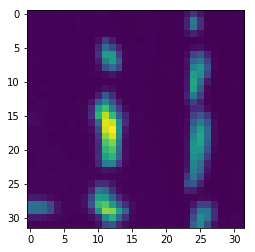


 Image[6] Split into sub-blocks: 



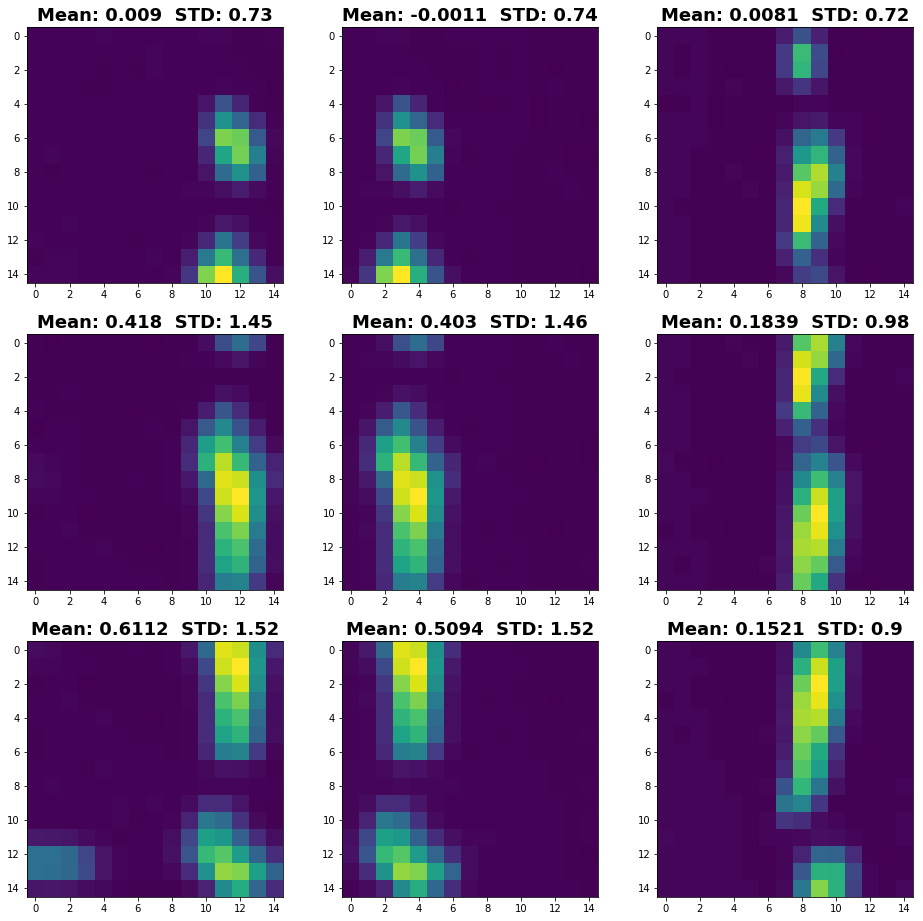

In [27]:


print('\n Image[6]:  ')
plt.imshow(im_1)
plt.show()

columns = 3
rows = 3
print('\n Image[6] Split into sub-blocks: \n')
fig=plt.figure(figsize=(16, 16))
fig.add_subplot(rows, columns, 1).set_title(block_1_str, fontsize=18, fontweight='bold')
plt.imshow(block_1)
fig.add_subplot(rows, columns, 2).set_title(block_6_str, fontsize=18, fontweight='bold')
plt.imshow(block_6)
fig.add_subplot(rows, columns, 3).set_title(block_3_str, fontsize=18, fontweight='bold')
plt.imshow(block_3)
fig.add_subplot(rows, columns, 4).set_title(block_7_str, fontsize=18, fontweight='bold')
plt.imshow(block_7)
fig.add_subplot(rows, columns, 5).set_title(block_5_str, fontsize=18, fontweight='bold')
plt.imshow(block_5)
fig.add_subplot(rows, columns, 6).set_title(block_8_str, fontsize=18, fontweight='bold')
plt.imshow(block_8)
fig.add_subplot(rows, columns, 7).set_title(block_2_str, fontsize=18, fontweight='bold')
plt.imshow(block_2)
fig.add_subplot(rows, columns, 8).set_title(block_9_str, fontsize=18, fontweight='bold')
plt.imshow(block_9)
fig.add_subplot(rows, columns, 9).set_title(block_4_str, fontsize=18, fontweight='bold')
plt.imshow(block_4)
plt.show()

# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)
# ax1.set_title('ax1 title')
# ax2.set_title('ax2 title')



#### Okay so Block Splitting Does work
#### How about the Means and Intensities?
#### Yep these also make sense

In [111]:
means=np.array([np.mean(block_1),np.mean(block_2),np.mean(block_3),np.mean(block_4),np.mean(block_5),np.mean(block_6),
               np.mean(block_7), np.mean(block_8),np.mean(block_9)])
stds=np.array([np.std(block_1),np.std(block_2),np.std(block_3),np.std(block_4),np.std(block_5),np.std(block_6),
               np.std(block_7), np.std(block_8),np.std(block_9)])
combined=np.concatenate((means,stds))

from prettytable import PrettyTable
t = PrettyTable(['mean std', ' mean std','mean std '], )
t.add_row([str(round(np.mean(block_1),5))+'  ' +str(round(np.std(block_1),5)),
           str(round(np.mean(block_6),5))+'  ' +str(round(np.std(block_6),5)),
           str(round(np.mean(block_3),5))+'  ' +str(round(np.std(block_3),5))])

t.add_row([str(round(np.mean(block_7),5))+'  ' +str(round(np.std(block_7),5)),
           str(round(np.mean(block_5),5))+'  ' +str(round(np.std(block_5),5)),
           str(round(np.mean(block_8),5))+'  ' +str(round(np.std(block_8),5))])

t.add_row([str(round(np.mean(block_2),5))+'  ' +str(round(np.std(block_2),5)),
           str(round(np.mean(block_9),5))+'  ' +str(round(np.std(block_9),5)),
           str(round(np.mean(block_4),5))+'  ' +str(round(np.std(block_4),5))])
print(t)


+------------------+-------------------+------------------+
|     mean std     |      mean std     |    mean std      |
+------------------+-------------------+------------------+
| 0.00899  0.73266 | -0.00114  0.73607 | 0.00807  0.71768 |
| 0.41799  1.44878 |  0.40303  1.45534 | 0.18391  0.97828 |
| 0.61121  1.52374 |  0.50936  1.52338 | 0.15215  0.90199 |
+------------------+-------------------+------------------+


#### Concatenation?

In [113]:
means=np.array([np.mean(block_1),np.mean(block_6),np.mean(block_3),np.mean(block_7),np.mean(block_5),np.mean(block_8),
               np.mean(block_2), np.mean(block_9),np.mean(block_4)])
stds=np.array([np.std(block_1),np.std(block_6),np.std(block_3),np.std(block_7),np.std(block_5),np.std(block_8),
               np.std(block_2), np.std(block_9),np.std(block_4)])
combined=np.concatenate((means,stds))
print(combined)


[ 8.98606199e-03 -1.14115048e-03  8.06541670e-03  4.17987625e-01
  4.03026968e-01  1.83910772e-01  6.11210369e-01  5.09362770e-01
  1.52148126e-01  7.32657190e-01  7.36071330e-01  7.17684393e-01
  1.44878148e+00  1.45534462e+00  9.78278267e-01  1.52374193e+00
  1.52337931e+00  9.01987418e-01]


#### Yep this also makes sense


In [144]:
means=np.array([np.mean(block_1),np.mean(block_2),np.mean(block_3),np.mean(block_4),np.mean(block_5),np.mean(block_6),
               np.mean(block_7), np.mean(block_8),np.mean(block_9)])
stds=np.array([np.std(block_1),np.std(block_2),np.std(block_3),np.std(block_4),np.std(block_5),np.std(block_6),
               np.std(block_7), np.std(block_8),np.std(block_9)])
combined=np.concatenate((means,stds))
print(combined)

[ 8.98606199e-03  6.11210369e-01  8.06541670e-03  1.52148126e-01
  4.03026968e-01 -1.14115048e-03  4.17987625e-01  1.83910772e-01
  5.09362770e-01  7.32657190e-01  1.52374193e+00  7.17684393e-01
  9.01987418e-01  1.45534462e+00  7.36071330e-01  1.44878148e+00
  9.78278267e-01  1.52337931e+00]


#### Data Array?

In [138]:
print(train_images.shape)

(13057, 32, 32)


In [143]:
review=block_splitting(train_images)
# print(review6)
print(review.shape)
print(review[6])

(13057, 18)
[ 8.98606199e-03  6.11210369e-01  8.06541670e-03  1.52148126e-01
  4.03026968e-01 -1.14115048e-03  4.17987625e-01  1.83910772e-01
  5.09362770e-01  7.32657190e-01  1.52374193e+00  7.17684393e-01
  9.01987418e-01  1.45534462e+00  7.36071330e-01  1.44878148e+00
  9.78278267e-01  1.52337931e+00]


In [145]:
def block_splitting(images):
    #Initialise Array:
    data_array=np.zeros(shape=(len(images),18))
    
    for i in range(len(images)):
        image = np.squeeze(train_images[i])
        #Split into blocks based on manually calculated pixel locations:
        block_1=image[0:15, 0:15]
        block_2=image[16:31, 0:15]
        block_3=image[0:15, 16:31]
        block_4=image[16:31, 16:31]
        block_5=image[8:23, 8:23]
        block_6=image[0:15, 8:23]
        block_7=image[8:23, 0:15]
        block_8=image[8:23, 16:31]
        block_9=image[16:31, 8:23]
        #Concatenate data into single 18-feature array:
        means=np.array([np.mean(block_1),np.mean(block_2),np.mean(block_3),np.mean(block_4),np.mean(block_5),np.mean(block_6),
               np.mean(block_7), np.mean(block_8),np.mean(block_9)])
        stds=np.array([np.std(block_1),np.std(block_2),np.std(block_3),np.std(block_4),np.std(block_5),np.std(block_6),
               np.std(block_7), np.std(block_8),np.std(block_9)])
        combined=np.concatenate((means,stds))
        #print(combined)
        data_array[i]=combined
    return data_array

#### Yep this also makes sense

#### Setting Max_Leaf Nodes:

Accuracy Training=  0.7494351683473852
Accuracy Validating=  0.7454044117647058


[Text(167.4, 181.2, 'X[17] <= 0.936\ngini = 0.314\nsamples = 13057\nvalue = [10511, 2546]'),
 Text(83.7, 108.72, 'X[13] <= 0.671\ngini = 0.178\nsamples = 10773\nvalue = [9707, 1066]'),
 Text(41.85, 36.23999999999998, 'gini = 0.145\nsamples = 9893\nvalue = [9115, 778]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.44\nsamples = 880\nvalue = [592, 288]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.438\ngini = 0.456\nsamples = 2284\nvalue = [804, 1480]'),
 Text(209.25, 36.23999999999998, 'gini = 0.319\nsamples = 1403\nvalue = [280, 1123]'),
 Text(292.95, 36.23999999999998, 'gini = 0.482\nsamples = 881\nvalue = [524, 357]')]

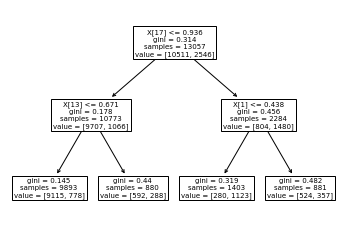

In [185]:
tree_model=tree.DecisionTreeClassifier(random_state=1, max_depth=15,max_leaf_nodes =4)
tree_model.fit(train_X,train_Y)

predicted_train=tree_model.predict(extra_train_X)
print('Accuracy Training= ', (1-mean_absolute_error(extra_train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

tree.plot_tree(tree_model.fit(train_X, train_Y))

#### Setting Min_Impurity_Decrease:

Accuracy Training=  0.5792141951837769
Accuracy Validating=  0.8131127450980392


[Text(167.4, 108.72, 'gini = 0.314\nsamples = 13057\nvalue = [10511, 2546]')]

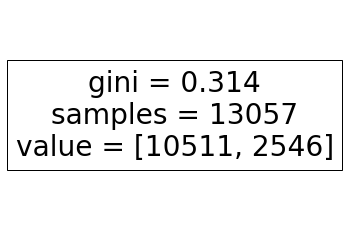

In [184]:
tree_model=tree.DecisionTreeClassifier(random_state=1, max_depth=15,min_impurity_decrease  =0.09)
tree_model.fit(train_X,train_Y)

predicted_train=tree_model.predict(extra_train_X)
print('Accuracy Training= ', (1-mean_absolute_error(extra_train_Y, predicted_train)))
predicted_valid=tree_model.predict(valid_X)
print('Accuracy Validating= ', (1-mean_absolute_error(valid_Y, predicted_valid)))

tree.plot_tree(tree_model.fit(train_X, train_Y))

#### Best Result so far!! Least Overfitting, best Valid Score!!! It Simply sets every value as ZERO!!!!!! (And gets accuracy=%Neg_Labels)

In [30]:
k = max(1,2,3,4,5,1,2)
k

5